In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://Deep_learning//ResNetIC50_log//Dataset//ODC-11K"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario5_EODC-11K_minmax

dataset = np.load(workdir + "//ODC11K_dataset.npz") # input file
ss0 = np.load(workdir + '//ODC11K_dataset_r0.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 9


In [6]:
x.shape

(11385, 19331)

In [7]:
training_image_array.shape

(10247, 19331)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10247, 19331) (10247,) (1138, 19331) (1138,)


In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10247, 19331)
10247 train samples
1138 test samples


In [11]:
np.argwhere(np.isnan(train_X))

array([], shape=(0, 2), dtype=int64)

In [12]:
# https://towardsdatascience.com/how-to-perform-ridge-and-ridge-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.001)

lasso_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2021-12-04 19:59:57.284049
EndTime : 2021-12-04 20:00:49.543259


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.642578125, tolerance: 4.1515655517578125
  positive)


In [13]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
predicted_classes = lasso_regressor.predict(test_X)

In [15]:
predicted_value = predicted_classes

In [16]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [17]:
import pickle
import joblib
workdir = "D://Deep_learning//ResNetIC50_log//Result//ODC-11K//Lasso"
joblib.dump(lasso_regressor, workdir + '//ODC11K_Lasso_model.pkl') 


['D://Deep_learning//ResNetIC50_log//Result//ODC-11K//Lasso//ODC11K_Lasso_model.pkl']

In [18]:
c.to_csv(workdir + '//ODC11K_Lasso_pred_obs_table.csv')

In [19]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7377341346965186, intercept=0.20452744647220855, rvalue=0.8234795324764135, pvalue=6.75504062871329e-282, stderr=0.015080157749740676)

In [20]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.6721683991566347


In [21]:
predicted_value.shape

(1138,)

In [22]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.0680029791018826


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


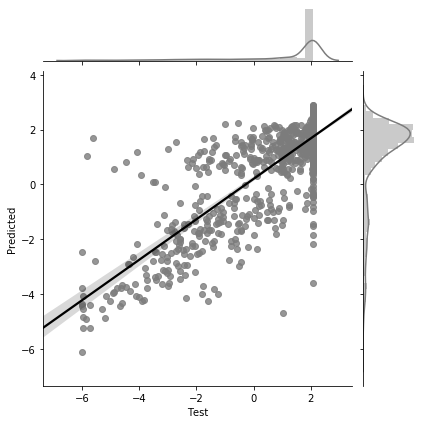

In [23]:
workdir = "D://Deep_learning//ResNetIC50_log//Figure//Backbone//ODC-11K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//ODC11K_Lasso.png', dpi=300)